In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
Data = pd.read_csv(r'D:\Machine Learning\Deep Learning A-Z\Deep_Learning_A_Z\Volume 2 - Unsupervised Deep Learning\Part 4 - Self Organizing Maps (SOM)\Self_Organizing_Maps\Credit_Card_Applications.csv')

In [3]:
Data.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [4]:
Data.isna().sum()

CustomerID    0
A1            0
A2            0
A3            0
A4            0
A5            0
A6            0
A7            0
A8            0
A9            0
A10           0
A11           0
A12           0
A13           0
A14           0
Class         0
dtype: int64

31.56820289855064
80.25
13.75


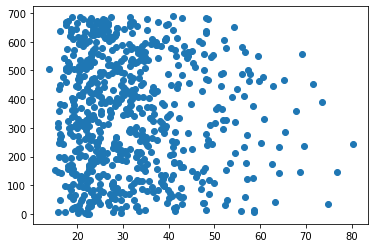

In [12]:
print(Data['A2'].mean())
print(Data['A2'].max())
print(Data['A2'].min())
plt.scatter(Data['A2'],range(Data.shape[0]))

In [5]:
X  = Data.iloc[:,:-1].values
Y = Data['Class'].values

In [6]:
X

array([[1.5776156e+07, 1.0000000e+00, 2.2080000e+01, ..., 2.0000000e+00,
        1.0000000e+02, 1.2130000e+03],
       [1.5739548e+07, 0.0000000e+00, 2.2670000e+01, ..., 2.0000000e+00,
        1.6000000e+02, 1.0000000e+00],
       [1.5662854e+07, 0.0000000e+00, 2.9580000e+01, ..., 2.0000000e+00,
        2.8000000e+02, 1.0000000e+00],
       ...,
       [1.5675450e+07, 0.0000000e+00, 1.8830000e+01, ..., 2.0000000e+00,
        1.0000000e+02, 1.0000000e+00],
       [1.5776494e+07, 0.0000000e+00, 2.7420000e+01, ..., 2.0000000e+00,
        1.2000000e+02, 1.2000000e+01],
       [1.5592412e+07, 1.0000000e+00, 4.1000000e+01, ..., 1.0000000e+00,
        5.6000000e+02, 1.0000000e+00]])

In [7]:
#feature scaling

In [8]:
from sklearn.preprocessing import MinMaxScaler
Me = MinMaxScaler()

In [9]:
X = Me.fit_transform(X)#normalisiing values between 0and1

In [10]:
from minisom import MiniSom

In [11]:
X


array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

In [14]:
som = MiniSom(10,10,input_len=15,sigma=1.0)#input_len = np of features

In [15]:
som.random_weights_init(X)
som.train_random(X,num_iteration=100)


In [16]:
from pylab import bone,pcolor,colorbar,plot,show

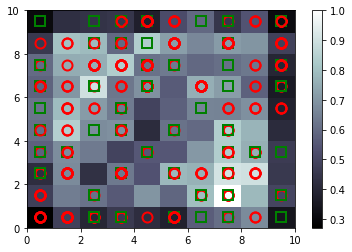

In [25]:
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o','s']
colors = ['r','g']
for i,x in enumerate(X):
    w = som.winner(x)
    plot(w[0] +0.5,w[1] +0.5, markers[Y[i]],mec=colors[Y[i]], mfc = 'None',
         ms = 10.0,mew=2.0)
show()    

In [26]:
mappings = som.win_map(X) 



In [27]:
mappings

defaultdict(list,
            {(1,
              0): [array([0.84268147, 1.        , 0.12526316, 0.40928571, 0.5       ,
                     0.23076923, 0.375     , 0.05561404, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.05      , 0.01212   ]), array([0.57477506, 1.        , 0.14030075, 0.08928571, 0.5       ,
                     0.        , 0.        , 0.00298246, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.05      , 0.04208   ]), array([5.45275078e-01, 1.00000000e+00, 5.26315789e-02, 1.07142857e-01,
                     5.00000000e-01, 2.30769231e-01, 3.75000000e-01, 1.40350877e-03,
                     0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
                     5.00000000e-01, 8.00000000e-02, 4.00000000e-04]), array([0.75215934, 1.        , 0.32827068, 0.02678571, 0.5       ,
                     0.23076923, 0.375     , 0.05263158, 0.        , 0.        ,
                     0. 

In [28]:
frauds = mappings[(7,1)]

In [29]:
frauds

[array([0.88304923, 0.        , 0.08150376, 0.02089286, 0.        ,
        0.38461538, 0.375     , 0.02052632, 1.        , 0.        ,
        0.        , 1.        , 0.5       , 0.08      , 0.        ]),
 array([0.80745128, 0.        , 0.54255639, 0.48517857, 0.5       ,
        0.23076923, 0.875     , 0.29824561, 1.        , 0.        ,
        0.        , 1.        , 0.5       , 0.        , 0.        ]),
 array([0.00850922, 0.        , 0.22300752, 0.12642857, 0.5       ,
        0.15384615, 0.5       , 0.01754386, 1.        , 0.        ,
        0.        , 1.        , 0.5       , 0.0855    , 0.        ]),
 array([0.0555362 , 0.        , 0.17037594, 0.09071429, 0.        ,
        0.38461538, 0.375     , 0.00877193, 1.        , 0.        ,
        0.        , 1.        , 0.5       , 0.185     , 0.        ]),
 array([0.30682059, 0.        , 0.65157895, 0.01196429, 0.5       ,
        0.15384615, 0.5       , 0.03508772, 1.        , 0.        ,
        0.        , 1.        , 0.5     

In [30]:
frauds_2 = mappings[(2,6)]

In [31]:
frauds_2

[array([0.08065143, 1.        , 0.39849624, 0.76785714, 0.5       ,
        0.69230769, 1.        , 0.70175439, 1.        , 1.        ,
        0.1641791 , 0.        , 0.5       , 0.        , 0.012     ]),
 array([1.02695322e-01, 1.00000000e+00, 5.18796992e-01, 8.95892857e-01,
        5.00000000e-01, 6.15384615e-01, 3.75000000e-01, 6.14035088e-02,
        1.00000000e+00, 1.00000000e+00, 4.47761194e-02, 0.00000000e+00,
        5.00000000e-01, 6.00000000e-02, 1.40000000e-04]),
 array([0.0967729 , 1.        , 0.2281203 , 0.53571429, 0.5       ,
        0.53846154, 0.875     , 0.18719298, 1.        , 1.        ,
        0.1641791 , 0.        , 0.5       , 0.        , 0.02283   ]),
 array([0.10656351, 1.        , 0.14165414, 0.39732143, 0.5       ,
        1.        , 0.875     , 0.01614035, 1.        , 1.        ,
        0.01492537, 0.        , 0.5       , 0.05      , 0.        ]),
 array([0.14712749, 1.        , 0.51759398, 0.27232143, 0.5       ,
        0.61538462, 0.875     , 0.543859

In [37]:
frauds =np.concatenate((frauds,frauds_2),axis=0)

In [38]:
frauds = Me.inverse_transform(frauds)

In [40]:
frauds[0]

array([1.5786237e+07, 0.0000000e+00, 1.9170000e+01, 5.8500000e-01,
       1.0000000e+00, 6.0000000e+00, 4.0000000e+00, 5.8500000e-01,
       1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
       2.0000000e+00, 1.6000000e+02, 1.0000000e+00])

In [42]:
fd = pd.DataFrame(frauds)

In [44]:
fd['cheater'] = fd[0]

In [46]:
fd.drop(0,inplace=True)

In [47]:
fd

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,cheater
1,15767358.0,0.0,49.83,13.585,2.0,4.0,8.0,8.500,1.0,0.0,0.0,1.0,2.0,0.0,1.0,15767358.0
2,15567839.0,0.0,28.58,3.540,2.0,3.0,5.0,0.500,1.0,0.0,0.0,1.0,2.0,171.0,1.0,15567839.0
3,15579583.0,0.0,25.08,2.540,1.0,6.0,4.0,0.250,1.0,0.0,0.0,1.0,2.0,370.0,1.0,15579583.0
4,15642336.0,0.0,57.08,0.335,2.0,3.0,5.0,1.000,1.0,0.0,0.0,1.0,2.0,252.0,2198.0,15642336.0
5,15740487.0,0.0,49.00,1.500,2.0,5.0,3.0,0.000,1.0,0.0,0.0,1.0,2.0,100.0,28.0,15740487.0
6,15811742.0,0.0,36.75,5.125,2.0,10.0,4.0,5.000,1.0,0.0,0.0,1.0,2.0,0.0,4001.0,15811742.0
7,15702571.0,0.0,22.50,11.000,1.0,11.0,4.0,3.000,1.0,0.0,0.0,1.0,2.0,268.0,1.0,15702571.0
8,15622083.0,0.0,17.58,9.000,2.0,6.0,4.0,1.375,1.0,0.0,0.0,1.0,2.0,0.0,1.0,15622083.0
9,15715907.0,0.0,31.57,3.500,2.0,2.0,4.0,3.000,1.0,0.0,0.0,1.0,2.0,300.0,1.0,15715907.0
10,15768342.0,0.0,41.33,1.000,2.0,3.0,5.0,2.250,1.0,0.0,0.0,1.0,2.0,0.0,301.0,15768342.0
